## Домашнє завдання: Лінійна регресія від багатьох змінних

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option('display.max_columns', 100)

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
file_name = '/content/drive/MyDrive/ML/data/cars.csv'

In [5]:
cars_df = pd.read_csv(file_name)

In [6]:
cars_df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [7]:
cars_df.shape

(100, 13)

**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


Типи даних колонок

In [8]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


Реальні типи даних у колонках типу object

In [9]:
for col in cars_df.select_dtypes(include=["object"]):
    print(cars_df[col].apply(type).value_counts())

Brand
<class 'str'>    100
Name: count, dtype: int64
Model
<class 'str'>    100
Name: count, dtype: int64
Fuel_Type
<class 'str'>    100
Name: count, dtype: int64
Transmission
<class 'str'>    100
Name: count, dtype: int64
Owner_Type
<class 'str'>    100
Name: count, dtype: int64


Кількість унікальних значень у категоріальних колонках


In [10]:
for col in cars_df.select_dtypes(include=["object"]):
    print(f"{col}: {cars_df[col].nunique()}")

Brand: 11
Model: 58
Fuel_Type: 2
Transmission: 2
Owner_Type: 3


**Опис**:

В наборі даних 8 числових (Year, Kilometers_Driven, Mileage, Engine, Power, Seats, Price) і 5 категоріальних (Brand, Model, Fuel_Type, Transmission, Owner_Type) колонок.
З них:
- 2 бінарна (колонка Fuel_Type, Transmission).
- 3 мультикатегоріальних:
  - 2 без порядку (Brand, Model);
  - 1 з порядком (Owner_Type)}

Висновок:

Всього внаборі даних маємо 13 колонок.


**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [11]:
inputs, targets = cars_df[["Car_ID", "Brand", "Model", "Year", "Kilometers_Driven", "Fuel_Type", "Transmission", "Owner_Type", "Mileage", "Engine", "Power", "Seats"]], cars_df["Price"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=12)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 12), (20, 12), (80,), (20,))

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

4.1 Кодування колонок з бінарними значеннями Fuel_Type і Transmission

In [14]:
def define_binary_codes(column):
  counts = column.value_counts(normalize=True)*100
  return {counts.idxmin(): 0, counts.idxmax():1}

In [15]:
fuel_type_code = define_binary_codes(inputs.Fuel_Type)
print(f"Значення, викоритовувані для кодування: {fuel_type_code}")
X_train["Fuel_Type_Code"] = X_train.Fuel_Type.map(fuel_type_code)
X_test["Fuel_Type_Code"] = X_test.Fuel_Type.map(fuel_type_code)

Значення, викоритовувані для кодування: {'Diesel': 0, 'Petrol': 1}


In [16]:
transmission_code = define_binary_codes(inputs.Transmission)
print(f"Значення, викоритовувані для кодування: {transmission_code}")
X_train["Transmission_Code"] = X_train.Transmission.map(transmission_code)
X_test["Transmission_Code"] = X_test.Transmission.map(transmission_code)

Значення, викоритовувані для кодування: {'Manual': 0, 'Automatic': 1}


In [17]:
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0


(None, None)

4.2 Кодування колонки Brand з використанням sklearn.preprocessing.OneHotEncoder

In [18]:
inputs.Brand.nunique()

11

In [19]:
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])
categories = enc.categories_[0]

In [20]:
one_hot_train = enc.transform(X_train[['Brand']]).toarray()
X_train[categories] = one_hot_train

In [21]:
one_hot_test = enc.transform(X_test[['Brand']]).toarray()
X_test[categories] = one_hot_test

In [22]:
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(None, None)

4.3  Кодування колонки Owner_Type з використанням sklearn.preprocessing.OrdinalEncoder

In [23]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [24]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Спостереження**:

Після застосування OrdinalEncoder до змінної Owner_Type у нас створилися   числові значення для кожної категорії в цій колонці. Так бачимо по Owner_Type_Codes, що кожна категорія отримала числове значення, що відповідає порядку її значення у оригінальній колонці.

Кодування колонки **Model**:

Для того, що зменшити значень для моделі, можемо згрупувати їх по класу моделі. Щоб визначити до якого класу модель належить можна використати цільову змінну, та на основі ціни автомобіля вирішити до якого класу вона належить.

Можемо розбити по квантилям цільової змінної, де
- Budget - автомобілі найнижчої цінової категорії, тобто з найнижчими значеннями цільової змінної (перший квантиль);
- Affordable - наступний ціновий сегмент, але ще не середній;
- Average - середній ціновий сегмент;
- Premium - сегмент "вище середнього";
- Luxury - найвищий ціновий сегмент автомобілів у вибірці (останній квантиль).



In [25]:
model_classes = ["Budget", "Affordable", "Average", "Premium", "Luxury"]
model_cat = pd.qcut(cars_df['Price'], q=5, labels=model_classes)

X_train["Model_Class"] = model_cat
X_test["Model_Class"] = model_cat

Отже тепер маємо 5 категорій для кожної з моделей. Та можемо застосувати OneHotEncoder

In [26]:
enc_model = preprocessing.OneHotEncoder()
enc_model.fit(X_train[['Model_Class']])
categories_m = enc_model.categories_[0]

In [27]:
one_hot_train_m = enc_model.transform(X_train[['Model_Class']]).toarray()
X_train[categories_m] = one_hot_train_m

In [28]:
one_hot_test_m = enc_model.transform(X_test[['Model_Class']]).toarray()
X_test[categories_m] = one_hot_test_m

In [29]:
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_Class,Affordable,Average,Budget,Luxury,Premium
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Average,0.0,1.0,0.0,0.0,0.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Premium,0.0,0.0,0.0,0.0,1.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Luxury,0.0,0.0,0.0,1.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Budget,0.0,0.0,1.0,0.0,0.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Premium,0.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_Class,Affordable,Average,Budget,Luxury,Premium
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Premium,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Budget,0.0,0.0,1.0,0.0,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Budget,0.0,0.0,1.0,0.0,0.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Affordable,1.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Budget,0.0,0.0,1.0,0.0,0.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [30]:
def corr_target_measure(df, target_variable, threshold=None, visualize=False):
  corr = df.corr()

  if threshold:
    corr = corr[(abs(corr) >= 0.5) & (abs(corr) < 0.9999)]

  if visualize:
    plt.figure(figsize = (12,8))
    sns.heatmap(data = corr, annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
    plt.show()

  corr = corr[target_variable].dropna(axis=0, how='all')
  print("Ознаки, що корелюють з цільовою змінною на більш ніж 0.5 за модулем")
  print(f"{'Незалежна змінна':<20} {'Кореляція з цідьовою змінною ' + target_variable :>10}")
  for i, v in corr.items():
    print(f"{i:<20s} {v:>10.4f}")


Залишаємо у вибірці лише числові типи

In [31]:
X_train = X_train.select_dtypes(include=['float64', 'int64'])
X_test = X_test.select_dtypes(include=['float64', 'int64'])

Видаляємо Car_ID з датасетів

In [32]:
X_train = X_train.drop(columns=['Car_ID'])
X_test = X_test.drop(columns=['Car_ID'])

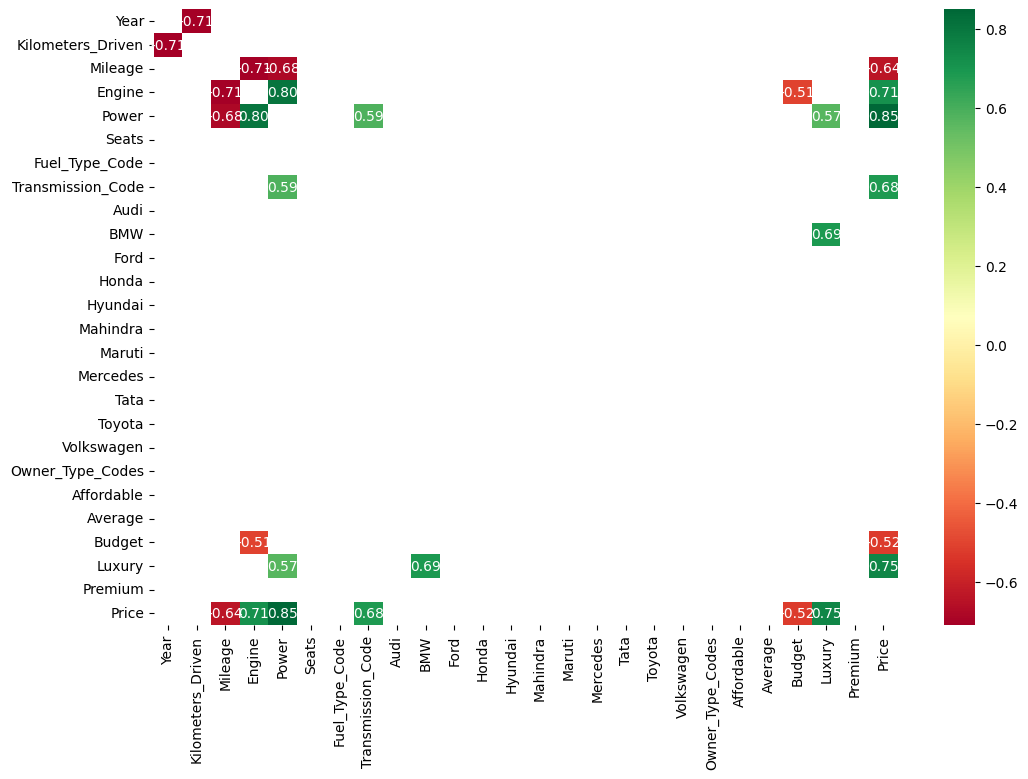

Ознаки, що корелюють з цільовою змінною на більш ніж 0.5 за модулем
Незалежна змінна     Кореляція з цідьовою змінною Price
Mileage                 -0.6384
Engine                   0.7106
Power                    0.8491
Transmission_Code        0.6807
Budget                  -0.5235
Luxury                   0.7460


In [33]:
train_concated = pd.concat([X_train, y_train], axis=1)
corr_vals = corr_target_measure(df=train_concated, target_variable="Price", threshold=0.5, visualize=True)

**Спостереження**:

- Можемо спостерігати достатньо високу позитивну кореляцію змінних Engine та Power (0.80);
- Наявна позитивна кореляція між змінними Power та Transmission_Code (0.59);

- Присутня достатньо висока негативна кореляція між змінними Engine та Mileage (-0.71);
- Присутня достатньо висока негативна кореляція між змінними Years та Kilometers_Driven (-0.71);
- Наявна негативна кореляція між змінними Power та Mileage (-0.68);

- Бачимо, що зімнна Luxury зі змінною BMW мають позитивну кореляцію (0.69) - що може говорити нам, що серед данного бренду маємо достатньо записів з даним ціновим сегментом;
- зімнна Luxury зі змінною Power мають позитивну кореляцію (0.57);
- Змінна Budget має негативну корреляцію зі змінною Engine (-0.52);


З цільовою зімінною корелють наступні змінні:
- Mileage - негативна кореляція (-0.64)
- Engine - позитивна кореляція (0.71)
- Power - позитивна кореляція (0.85)
- Transmission_Code - позитивна кореляція (0.68)
- Budget - негативна кореляція (-0.52)
- Luxury - позитивна кореляція (0.75)

Найбільша кореляція спостерігається між незалежною змінною Power та змінною Price.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [34]:
class RegressionModel:
  def __init__(self, X_train, y_train, X_test, y_test):
    self.X_train = X_train
    self.y_train = y_train
    self.X_test = X_test
    self.y_test = y_test
    self.model = None

    self.train_prediction = None
    self.test_prediction = None

    self.train_loss = None
    self.test_loss = None

    self.train_residuals = None
    self.test_residuals = None

  def count_loss(self, fact, prediction):
    return np.sqrt(mean_squared_error(fact, prediction))

  def evaluate(self):
    self.train_prediction = self.predict(self.X_train)
    self.test_prediction = self.predict(self.X_test)
    self.train_loss = self.count_loss(self.y_train,  self.train_prediction)
    self.test_loss = self.count_loss(self.y_test, self.test_prediction)
    print(f"train_loss: {self.train_loss}, test_loss: {self.test_loss}")
    self.count_resuduals()
    return self

  def visualize_scatter(self, residuals=False):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(self.y_train, self.train_prediction, alpha=0.6, color="blue")
    plt.plot([min(self.y_train), max(self.y_train)], [min(self.y_train), max(self.y_train)], color="red", linestyle="--",)
    plt.title(f"Тренувальні дані")
    plt.xlabel("Реальні значення")
    plt.ylabel("Передбачення")
    plt.grid(alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.scatter(y_test, self.test_prediction, alpha=0.6, color="blue")
    plt.plot([min(self.y_test), max(self.y_test)], [min(self.y_test), max(self.y_test)], color="red", linestyle="--")
    plt.title(f"Тестувальні дані")
    plt.xlabel("Реальні значення")
    plt.ylabel("Передбачення")
    plt.grid(alpha=0.3)
    plt.show()

    if residuals:
      self.visualize_residuals()
    return self

  def count_resuduals(self):
    self.train_residuals = self.y_train - self.train_prediction
    self.test_residuals = self.y_test - self.test_prediction
    return self

  def visualize_residuals(self):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(self.train_residuals, kde=True, bins=30, color="blue", label="Залишки")
    plt.title("Гістограма залишків \n тестувальний набір")
    plt.xlabel("Залишки")
    plt.ylabel("Частота")
    plt.legend()
    plt.grid(alpha=0.3)

    plt.subplot(1, 2, 2)
    sns.histplot(self.test_residuals, kde=True, bins=30, color="blue", label="Залишки")
    plt.title("Гістограма залишків \n Тренувальний набір")
    plt.xlabel("Залишки")
    plt.ylabel("Частота")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()
    return self


In [35]:
class LinearRegressionModel(RegressionModel):
    def __init__(self, X_train, y_train, X_test, y_test):
      super().__init__(X_train, y_train, X_test, y_test)
      self.model = LinearRegression()

    def fit(self):
        self.model.fit(self.X_train, self.y_train)
        return self

    def predict(self, X):
      if not hasattr(self.model, 'coef_'):
          raise ValueError("Model is not trained. Call `fit` before predicting.")
      return self.model.predict(X)

    def evaluate(self):
      self.train_prediction = self.predict(self.X_train)
      self.test_prediction = self.predict(self.X_test)
      self.train_loss = self.count_loss(self.y_train,  self.train_prediction)
      self.test_loss = self.count_loss(self.y_test, self.test_prediction)
      print(f"train_loss: {self.train_loss}, test_loss: {self.test_loss}")
      self.count_resuduals()
      return self

    def get_weight(self):
      weights_df = pd.DataFrame({
        'feature': np.append(numeric_cols + cat_cols, 1),
        'weight': np.append(self.model.coef_, self.model.intercept_)
      })
      return weights_df.sort_values('weight', ascending=False)


train_loss: 141834.52647060942, test_loss: 173866.79006305768


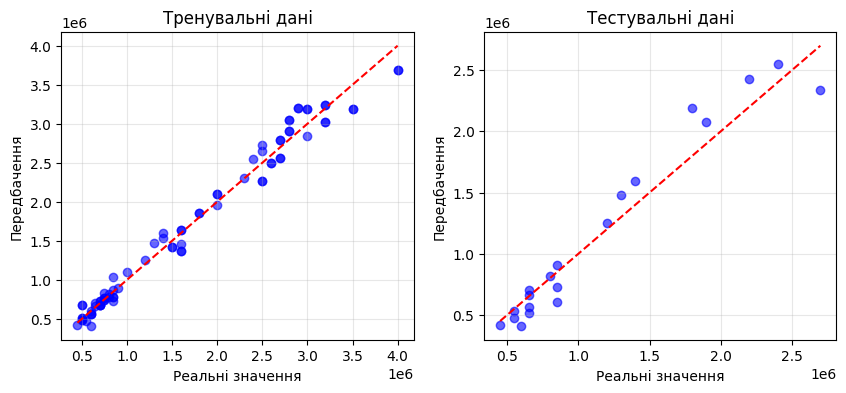

In [36]:
model_skl = LinearRegressionModel(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test).fit().evaluate().visualize_scatter()

**Спостереження**:

Що для тренувального набору, що для тестувального можемо спостерігати наступні значення RMSE:
- Для тернування набору RMSE = 141834.53
- Для тестувального набору RMSE = 173866.79

Отже маємо певну похибку передбачення.

На тренувальному наборі точки розкидані не так сильно, як на тестувальному. Тож на тестувальному наборі модель передбачає гірше, що можемо бачити і зі значень
RMSE.


**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цільову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

7.1. Масштабування незалежних змінних використовуючи StandardScaler

In [37]:
numeric_cols = ['Year', 'Kilometers_Driven', 'Mileage', "Engine", "Power", "Seats"]
cat_cols = [col for col in X_train.columns if col not in numeric_cols]

In [38]:
std_scaler_num = StandardScaler().set_output(transform="pandas").fit(X_train[numeric_cols])
X_train_num_scaled = std_scaler_num.transform(X_train[numeric_cols])
X_test_num_scaled = std_scaler_num.transform(X_test[numeric_cols])

In [39]:
display(X_train_num_scaled.head()), display(X_test_num_scaled.head())

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
83,0.568813,-0.693871,0.274862,-0.628491,-0.231967,-0.303562
55,-0.323442,-0.039533,-0.018324,0.087196,0.247012,-0.303562
26,-0.323442,-0.039533,-0.604696,0.111560,0.910213,-0.303562
54,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562
19,-1.215697,-0.257646,-1.484254,0.122219,0.910213,-0.303562


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
17,-2.107952,1.051030,-0.604696,-0.785333,-0.231967,-0.303562
41,0.568813,-0.257646,0.861234,-1.255859,-1.214487,-0.303562
92,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562
14,1.461068,-1.130096,0.568048,-0.683310,-0.784634,2.394771
68,0.568813,-0.257646,0.861234,-1.091404,-0.895168,-0.303562


(None, None)

In [40]:
X_train_scaled = X_train_num_scaled.copy()
X_train_scaled[cat_cols] = X_train[cat_cols].values

X_test_scaled = X_test_num_scaled.copy()
X_test_scaled[cat_cols] = X_test[cat_cols].values

In [41]:
display(X_train_scaled.head()), display(X_test_scaled.head())

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Affordable,Average,Budget,Luxury,Premium
83,0.568813,-0.693871,0.274862,-0.628491,-0.231967,-0.303562,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
55,-0.323442,-0.039533,-0.018324,0.087196,0.247012,-0.303562,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26,-0.323442,-0.039533,-0.604696,0.111560,0.910213,-0.303562,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
19,-1.215697,-0.257646,-1.484254,0.122219,0.910213,-0.303562,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Affordable,Average,Budget,Luxury,Premium
17,-2.107952,1.051030,-0.604696,-0.785333,-0.231967,-0.303562,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
41,0.568813,-0.257646,0.861234,-1.255859,-1.214487,-0.303562,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0
92,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
14,1.461068,-1.130096,0.568048,-0.683310,-0.784634,2.394771,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,0.568813,-0.257646,0.861234,-1.091404,-0.895168,-0.303562,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0


(None, None)

7.2

train_loss: 141834.52647061122, test_loss: 173866.7900630578


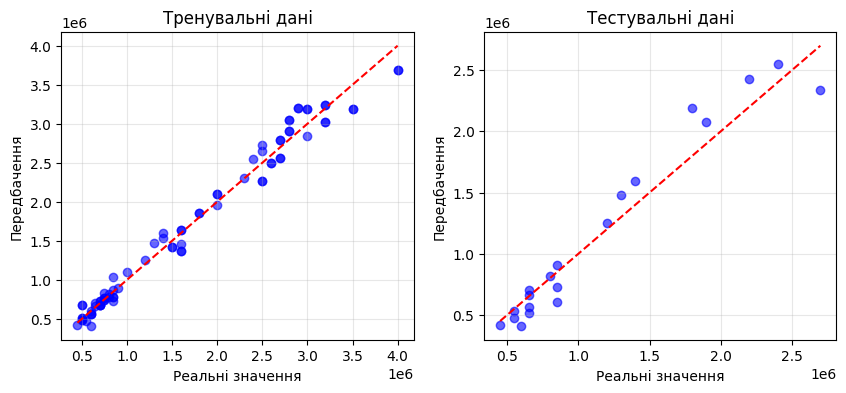

,feature,weight
25,1,1.782512e+06
23,Luxury,1.006774e+06
24,Premium,4.701843e+05
15,Mercedes,3.345684e+05
4,Power,3.201681e+05
8,Audi,2.628993e+05
18,Volkswagen,1.506572e+05
19,Owner_Type_Codes,5.681111e+04
16,Tata,4.390390e+04
0,Year,4.378233e+04


In [42]:
model_scaled = LinearRegressionModel(X_train=X_train_scaled, y_train=y_train, X_test=X_test_scaled, y_test=y_test).fit().evaluate().visualize_scatter()
model_scaled.get_weight()

In [43]:
print(f"{'Model':<10} {'Train Loss (RMSE)':>20} {'Test Loss (RMSE)':>20}")
print(f"{'1':<10} {model_skl.train_loss:>20.4f} {model_skl.test_loss:>20.4f}")
print(f"{'2':<10} {model_scaled.train_loss:>20.4f} {model_scaled.test_loss:>20.4f}")

Model         Train Loss (RMSE)     Test Loss (RMSE)
1                   141834.5265          173866.7901
2                   141834.5265          173866.7901


**Спостереження**:

- Можемо бачити, що модель до масштабування ознак і після мають однакові значення RMSE що для тестувального, що для тренувального наборів.

- Найвпливовіші колонки з точки зору коефіцієнтів та їх напрям дії:
(Достатня кількість коефіціентів що є ознаками моделі, є найпливовішими, тому буде доцільно розглянути серед моделей та бренду самі найпливовіші, і додатиопис для колонок, що не такі впливові з точки зору абсолютної величини коефіцієнтів, але є характеристиками будь якого автомобіля. Тому в опис включені також і не найбільші за абсолютним значенням коефіцієнт )
  - Luxury - позитивий вплив на цільову змінну, оскільки даний клас і призначався, для авто з найбльшою ціновою категорію, де 80% дешевші;
  - Premium - позитивий вплив на цільову змінну, оскільки даний клас і призначався, для авто з найбльшою ціновою категорію, це другий за величиную ціни класс після Luxury, до якого відносяться австо дорожчі за 60% інших австомобілей;
  - Mercedes - позитивний плив на цільову змінну - доволі відомий бренд авто з гарною репутацією, що мають у свої лінійці ті, що за ціною можуть відноситись до класів Premium та Luxury;
  - Power - позитивний вплив на цільову змінну адже більша потужність двигуна може свідчити про більш дорогий або продуктивний автомобіль;
  - Audi - позитивний вплив на цільову змінну, також відомий бренд автомобілей з більш високими цінами на них;
  - Budget - негативний влив на цільову змінну, адже до цього класу увійшли автомобілі які є дешевшими за 80%.
  - Affordable - негативний влив на цільову змінну, адже до цього класу увійшли автомобілі які є дешевшими за 60%.
  - Mahindra - негативний влив на цільову змінну, виглядає як не дуже відомий бренд, котрий можливо має не дуже гарну репутацію, і скоріше відноситься до бюджетних авто.
  - Fuel_Type_Code - негативний коефіцієнт, який говорить, що бензинові автомобілі (які позначаються як 'Petrol' = 1) є дешевшими на ринку порівняно з дизельними автомобілями (де 'Diesel' = 0).

  - Transmission_Code	- Негативний коефіцієнт вказує, що автоматична трансмісія (1) має негативний вплив на ціну автомобіля порівняно з механічною трансмісією(0).
  - Seats - негативний напрям, певні моделі з великою кількістю сидінь (наприклад, вантажні автомобілі або автобуси) можуть мати меншу ціну, ніж легкові автомобілі;
  - Engine - негативний коефіцієнт вказує, що збільшення об'єму двигуна призводить до зниження вартості автомобіля

  

 Логічність напрямку впливу змінних.

 наприклад змінні Luxury, Premium, Mercedes, Power, Audi - мають позитивні коефіцієнти, що означає, що збільшення значення кожної з цих ознак буде сприяти збільшенню цільової змінної, що є цілком логічно.

 Також, що до основних "сенсових" змінних, якы притаманні кожному автомобілю і є характиристиками кожного з автомобілей типу Mileage, Engine, Seats, Fuel_Type_Code, Kilometers_Driven — їх збільшення призводить до зниження ціни. Це цілком логічно, оскільки, наприклад дизельні двигуни є більш економічними, що формує відповідний попит на них. Більша кількість місць в авто, може вказувати на автомобілі лля перевезень з меншим попитом. Чим більший пробіг у авто тим менше його ціна.

 В більшості коефіцієнтів виглядає так, що знак біля нього цілком логічний.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [44]:
class OlsRegressionModel(RegressionModel):
  def __init__(self, X_train, y_train, X_test, y_test):
    super().__init__(X_train, y_train, X_test, y_test)
    self.X_test = sm.add_constant(self.X_test)
    self.X_train = sm.add_constant(self.X_train)
    self.model = self.init_model()
    self.result = None
    self.params = None
    self.summary = None

  def init_model(self):
    Y = self.y_train
    X = self.X_train
    return sm.OLS(Y,X)

  def fit(self):
    self.result = self.model.fit()
    self.params = self.result.params
    self.summary = self.result.summary()
    return self

  def predict(self, X):
    return self.result.predict(X)

  def evaluate(self):
    self.train_prediction = self.predict(self.X_train)
    self.test_prediction = self.predict(self.X_test)
    self.count_resuduals()
    return self

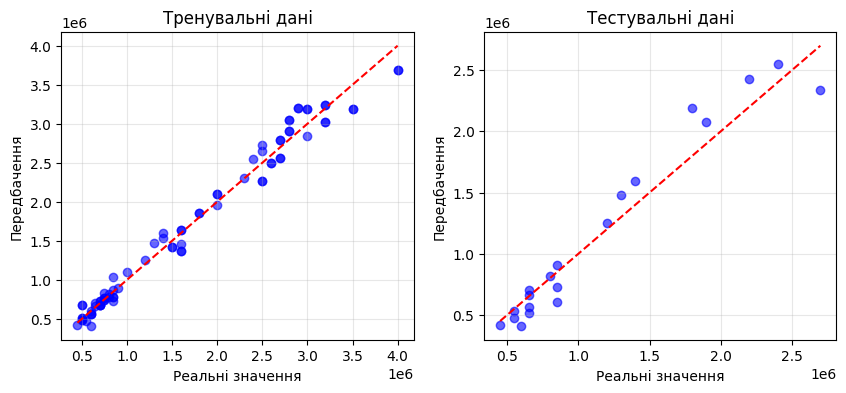

In [45]:
ols_result = OlsRegressionModel(X_train=X_train_scaled, y_train=y_train, X_test=X_test_scaled, y_test=y_test).fit()
ols_result.evaluate().visualize_scatter()

In [46]:
print(ols_result.params)
print(ols_result.summary)

const                1.380819e+06
Year                 4.378233e+04
Kilometers_Driven   -3.255389e+04
Mileage             -7.834908e+04
Engine              -1.269994e+04
Power                3.201681e+05
Seats               -2.830238e+04
Fuel_Type_Code      -2.643499e+05
Transmission_Code   -9.585441e+04
Audi                 3.884283e+05
BMW                  1.679145e+05
Ford                -6.092332e+04
Honda                7.773550e+04
Hyundai              4.627167e+04
Mahindra            -2.958780e+05
Maruti              -1.457147e+04
Mercedes             4.600974e+05
Tata                 1.694329e+05
Toyota               1.661252e+05
Volkswagen           2.761862e+05
Owner_Type_Codes     5.681111e+04
Affordable          -2.423441e+05
Average              5.304252e+04
Budget              -4.591655e+05
Luxury               1.282938e+06
Premium              7.463480e+05
dtype: float64
                            OLS Regression Results                            
Dep. Variable:        

In [47]:
def vif(matrix):
  matrix = sm.add_constant(matrix)
  vif_data = pd.DataFrame()
  vif_data["Variable"] = matrix.columns
  vif_data["VIF"] = [variance_inflation_factor(matrix.values, i) for i in range(matrix.shape[1])]
  return vif_data

In [48]:
stat_significant_columns = [col for col, p in ols_result.result.pvalues.items() if p < 0.05]
print(stat_significant_columns)

['const', 'Power', 'Fuel_Type_Code', 'Audi', 'Mahindra', 'Mercedes', 'Volkswagen', 'Affordable', 'Budget', 'Luxury', 'Premium']


**Спостереження**:

- Маємо значення R-suqared близьким до 1 - **0,981**, що свідчить, що модель має достатньо не погану якість.

- До статистично значущих коефіцієнтів відносяться:
  - константа
  - Power - має сильний позитивний вплив на ціну авто
  - Fuel_Type_Code - має зворотній вплив на ціну авто де (1-бензин , а 0-дизель )
  - Audi - має позитивний вплив на ціну авто
  - Mahindra - має зворотній вплив на ціну авто    
  - Mercedes - має позитивний вплив на ціну авто
  - Volkswagen - має позитивний вплив на ціну авто
  - Affordable - має зворотній вплив на ціну авто  
  - Budget  - має зворотній вплив на ціну авто  
  - Luxury - має позитивний вплив на ціну авто
  - Premium - має позитивний вплив на ціну авто


Бачимо примітку, що матриця є сингулярною. Отже маємо мультиколінеарність, що впливає на визначення статистичної значущості коефіцієнтів моделі.

In [49]:
print(vif(X_train_scaled))

             Variable       VIF
0               const  0.000000
1                Year  6.059307
2   Kilometers_Driven  4.921005
3             Mileage  6.359253
4              Engine  7.156738
5               Power  8.550677
6               Seats  2.646982
7      Fuel_Type_Code  3.137691
8   Transmission_Code  5.056503
9                Audi       inf
10                BMW       inf
11               Ford       inf
12              Honda       inf
13            Hyundai       inf
14           Mahindra       inf
15             Maruti       inf
16           Mercedes       inf
17               Tata       inf
18             Toyota       inf
19         Volkswagen       inf
20   Owner_Type_Codes  3.252014
21         Affordable       inf
22            Average       inf
23             Budget       inf
24             Luxury       inf
25            Premium       inf


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Отже маємо для деяких змінних значення інфляції inf тобто нескінченність, що говорить, що 1 зміна може бути вираженою через лінійну комбінацію інших. Як можемо бачити такі значення міри інфляції на всих змінних які отримали в результаті OneHot кодування. Попередження з діленням на нуль виникає, через мультиколінеаріність де коефіцієнт детермінації рівний 1, а отже між змінними наявна лінійна замалежність.

Тож можемо спробувати позбутися від мультикрлінеарності, та порівняти якість моделей


In [50]:
col_to_del = ["Honda", "Affordable"]
df_train_w_mc = X_train_scaled.drop(columns=col_to_del)
df_test_w_mc = X_test_scaled.drop(columns=col_to_del)

In [51]:
ols_resul_w_mc = OlsRegressionModel(X_train=df_train_w_mc, y_train=y_train, X_test=df_test_w_mc, y_test=y_test).fit()
print(ols_resul_w_mc.summary)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     126.9
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           3.62e-40
Time:                        21:01:18   Log-Likelihood:                -1062.5
No. Observations:                  80   AIC:                             2173.
Df Residuals:                      56   BIC:                             2230.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.216e+06   1.17e+0

In [52]:
print(vif(df_train_w_mc))

             Variable        VIF
0               const  38.207442
1                Year   6.059307
2   Kilometers_Driven   4.921005
3             Mileage   6.359253
4              Engine   7.156738
5               Power   8.550677
6               Seats   2.646982
7      Fuel_Type_Code   3.137691
8   Transmission_Code   5.056503
9                Audi   6.532132
10                BMW   9.069676
11               Ford   6.219594
12            Hyundai   4.008784
13           Mahindra   2.684208
14             Maruti   3.191773
15           Mercedes   7.573672
16               Tata   4.070360
17             Toyota   4.399056
18         Volkswagen   5.322470
19   Owner_Type_Codes   3.252014
20            Average   3.509147
21             Budget   3.564216
22             Luxury  16.918560
23            Premium  10.523503


Бачимо, що значення фактору інфляції достатньо високе для класів моделі авто Luxury та Premium.

In [53]:
stat_significant_columns_w_mc = [col for col, p in ols_resul_w_mc.result.pvalues.items() if p < 0.05]
print(stat_significant_columns_w_mc)

['const', 'Power', 'Fuel_Type_Code', 'Mahindra', 'Mercedes', 'Average', 'Budget', 'Luxury', 'Premium']


Бачимо, що видаливши зміні "Honda" та "Affordable", зі страт занчущих коефіцієнтів пропали не лише 'Affordable' (що зникла через видалення), а і 'Audi' та 'Volkswagen' на рівні значущості 0.05

In [54]:
print(f"Rsquared: {ols_result.result.rsquared}, Rsquared_adj: {ols_result.result.rsquared_adj}")

Rsquared: 0.9811799067752107, Rsquared_adj: 0.9734502256293152


In [55]:
print(f"Rsquared: {ols_resul_w_mc.result.rsquared}, Rsquared_adj: {ols_resul_w_mc.result.rsquared_adj}")

Rsquared: 0.9811799067752107, Rsquared_adj: 0.9734502256293152


Після того як позбавились мультиколінеарності, якість моделі не змінилась, значення Rsquared та Rsquared_adj для двох моделей рівні.

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [56]:
stat_significant_columns = [col for col, p in ols_result.result.pvalues.items() if p < 0.05]
print(stat_significant_columns)

['const', 'Power', 'Fuel_Type_Code', 'Audi', 'Mahindra', 'Mercedes', 'Volkswagen', 'Affordable', 'Budget', 'Luxury', 'Premium']


In [57]:
significant_columns_existing = [col for col in stat_significant_columns if col in X_train_scaled.columns]
X_train_ss = X_train_scaled[significant_columns_existing]
X_test_ss = X_test_scaled[significant_columns_existing]

In [58]:
ols_model_ss = OlsRegressionModel(X_train=X_train_ss, y_train=y_train, X_test=X_test_ss, y_test=y_test).fit()
print(ols_model_ss.summary)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     282.7
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           7.24e-52
Time:                        21:01:19   Log-Likelihood:                -1071.9
No. Observations:                  80   AIC:                             2166.
Df Residuals:                      69   BIC:                             2192.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.46e+06    5.7e+04     25.

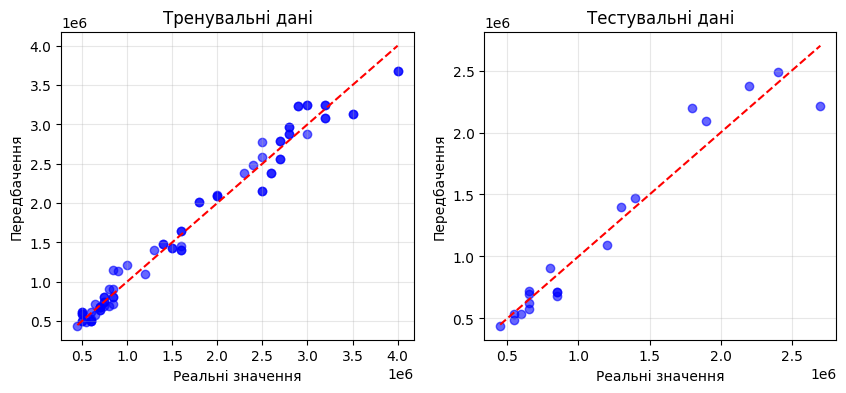

In [59]:
ols_model_ss.evaluate().visualize_scatter()

In [60]:
print(f"Rsquared: {ols_model_ss.result.rsquared}, Rsquared_adj: {ols_model_ss.result.rsquared_adj}")

Rsquared: 0.9761733874167314, Rsquared_adj: 0.9727202551582868


Можна спробувати натренувати модель з використанням статистично значущих коефіцієнів після того, як частково прибрали мультиколінеарність через явні лінійні залежності.

In [61]:
sg = [col for col in stat_significant_columns_w_mc if col in X_train_scaled.columns]
ols_ss_without_mc = OlsRegressionModel(X_train=X_train_scaled[sg], y_train=y_train, X_test=X_test_scaled[sg], y_test=y_test).fit()
print(ols_ss_without_mc.summary)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     319.5
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           1.72e-52
Time:                        21:01:20   Log-Likelihood:                -1077.0
No. Observations:                  80   AIC:                             2172.
Df Residuals:                      71   BIC:                             2193.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.03e+06   5.86e+04     17.

In [62]:
print(f"Rsquared: {ols_ss_without_mc.result.rsquared}, Rsquared_adj: {ols_ss_without_mc.result.rsquared_adj}")

Rsquared: 0.9729763497483511, Rsquared_adj: 0.9699314314101372


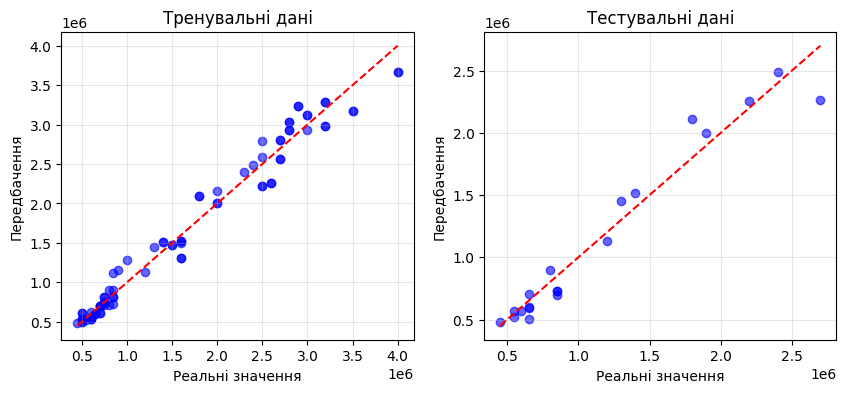

In [63]:
ols_ss_without_mc.evaluate().visualize_scatter()

Бачимо, що прибравши мультиколінеарність - якість моделі не збільшилась, а навіть трішки зменшилась.

Можемо також подивитись на результати, якщо натренувати модель sklearn з використанням лише статистично значимих коефіцієнтів

train_loss: 159588.73400999536, test_loss: 172920.8430525474


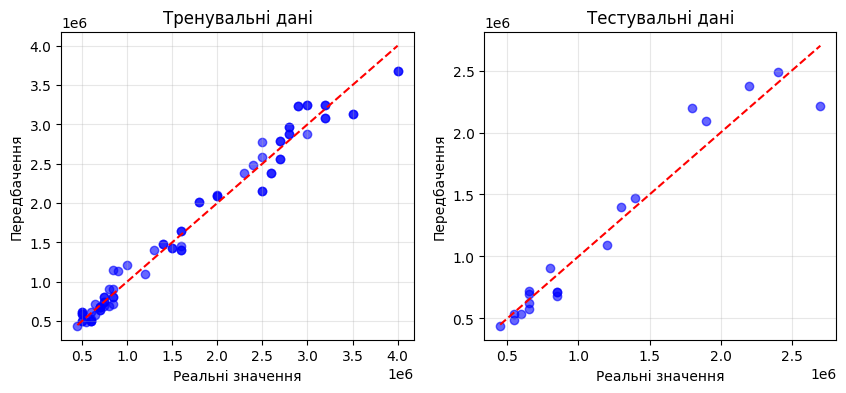

In [64]:
model_ss = LinearRegressionModel(X_train=X_train_ss, y_train=y_train, X_test=X_test_ss, y_test=y_test).fit().evaluate().visualize_scatter()

З діаграм розсіювання бачимо, що результати передбачення дуже схожі для двох моделей.

In [65]:
print(f"Rsquared: {ols_result.result.rsquared}, Rsquared_adj: {ols_result.result.rsquared_adj} - модель з усіма коефіцієнтами")

print(f"Rsquared: {ols_model_ss.result.rsquared}, Rsquared_adj: {ols_model_ss.result.rsquared_adj} - лише стат.значущі")
print(f"Rsquared: {ols_ss_without_mc.result.rsquared}, Rsquared_adj: {ols_ss_without_mc.result.rsquared_adj} - лише стат значущі без мультиколіневрності")

Rsquared: 0.9811799067752107, Rsquared_adj: 0.9734502256293152 - модель з усіма коефіцієнтами
Rsquared: 0.9761733874167314, Rsquared_adj: 0.9727202551582868 - лише стат.значущі
Rsquared: 0.9729763497483511, Rsquared_adj: 0.9699314314101372 - лише стат значущі без мультиколіневрності


**Висновок**:
Після спроби тренування на лише статистично значущих коефіцієнтах маємо наступні результати:

| Модель                                       | $R_{adj}^2$ | $R_{adj}^2$  |
|----------------------------------------------|-------------|--------------|
| Модель із всима коефіцієнтами                | 0.9812      | 0.9735       |
| Модель із коефіцієнтами, де p-value < 0.05   | 0.9762      | 0.9727       |


Після тренування моделі з statsmodels лише на стат значущих коефіцієнтах значення R2 та Adj. R-squared трішки зменшуються.

Отже якість моделі погіршується.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [66]:
significant_columns = [f"{col}" for col, p in ols_result.result.pvalues.items() if p < 0.25]
print(significant_columns)

['const', 'Mileage', 'Power', 'Fuel_Type_Code', 'Audi', 'BMW', 'Mahindra', 'Mercedes', 'Tata', 'Toyota', 'Volkswagen', 'Affordable', 'Budget', 'Luxury', 'Premium']


Серед коефіцієнтів, що яких p_value менше за 0.25:

- const
- Mileage
- Power
- Fuel_Type_Code
- Audi
- BMW
- Mahindra
- Mercedes
- Tata
- Toyota
- Volkswagen
- Affordable
- Budget
- Luxury
- Premium

In [67]:
significant_columns_existing = [col for col in significant_columns if col in X_train_scaled.columns]
X_train_ss_25 = X_train_scaled[significant_columns_existing]
X_test_ss_25 = X_test_scaled[significant_columns_existing]

In [68]:
ols_model_ss_25 = OlsRegressionModel(X_train=X_train_ss_25, y_train=y_train, X_test=X_test_ss_25, y_test=y_test).fit()
print(ols_model_ss_25.summary)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     209.6
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           2.17e-48
Time:                        21:01:21   Log-Likelihood:                -1068.1
No. Observations:                  80   AIC:                             2166.
Df Residuals:                      65   BIC:                             2202.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.386e+06   6.75e+04     20.

In [69]:
print(f"Rsquared: {ols_model_ss_25.result.rsquared}, Rsquared_adj: {ols_model_ss_25.result.rsquared_adj}")

Rsquared: 0.978332577153102, Rsquared_adj: 0.973665747616847


Бачимо невелике, але покращення відносно моделі з коефіцієнтами на рівні значущості p-value < 0.05.

Спробуємо передбачити на тренувальному та тестовому наборі

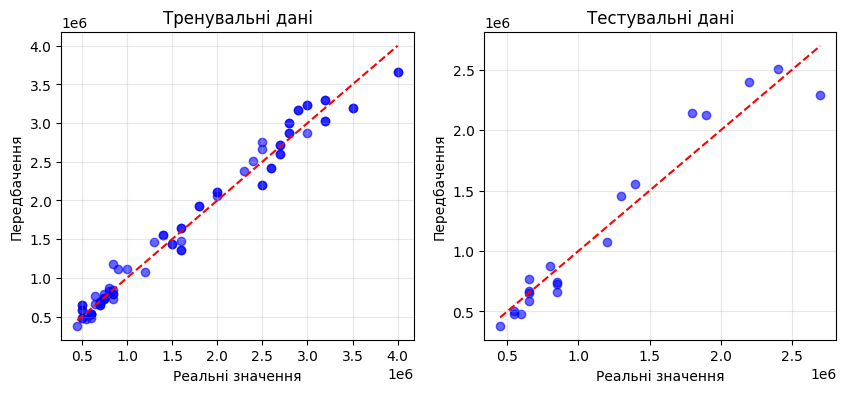

In [70]:
ols_model_ss_25.evaluate().visualize_scatter()

Можемо також подивитись на результати, якщо натренувати модель sklearn з використанням лише статистично значимих коефіцієнтів з значенням p_value < 0.25, та подивитись як буде модель передбачувати на тестувальних даних.

train_loss: 152186.001734177, test_loss: 168510.85220089855


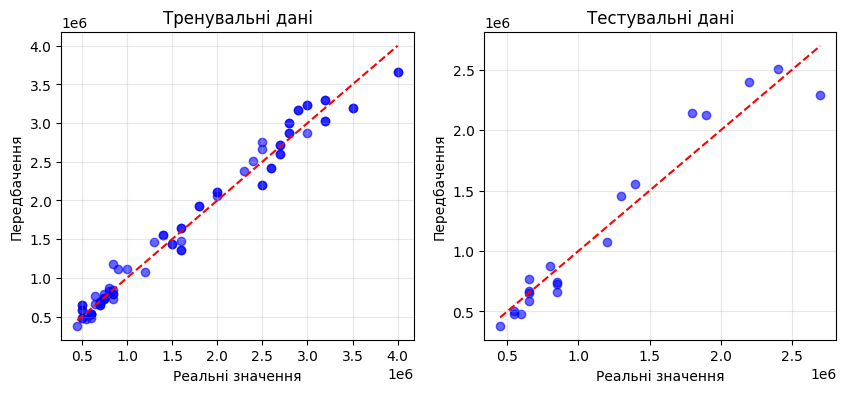

In [71]:
model_ss_25 = LinearRegressionModel(X_train=X_train_ss_25, y_train=y_train, X_test=X_test_ss_25, y_test=y_test).fit().evaluate().visualize_scatter()

З діаграм розсіювання бачимо ідентичні результати для двох моделей.

Зведені результати:


In [72]:
print(f"{'Model':<40} {'Rsquared':>20} {'Rsquared_adj':>20}")
print(f"{'OLS на всіх коефіцієнтах':<40} {ols_result.result.rsquared},  {ols_result.result.rsquared_adj}")
print(f"{'OLS із коефіцієнтами, де p-value < 0.05':<40} {ols_model_ss.result.rsquared},  {ols_model_ss.result.rsquared_adj}")
print(f"{'OLS із коефіцієнтами, де p-value < 0.25':<40} {ols_model_ss_25.result.rsquared},  {ols_model_ss_25.result.rsquared_adj}")

Model                                                Rsquared         Rsquared_adj
OLS на всіх коефіцієнтах                 0.9811799067752107,  0.9734502256293152
OLS із коефіцієнтами, де p-value < 0.05  0.9761733874167314,  0.9727202551582868
OLS із коефіцієнтами, де p-value < 0.25  0.978332577153102,  0.973665747616847


Додатково розглянуті моделі:

In [73]:
print(f"{'Model':<40} {'Rsquared':>20} {'Rsquared_adj':>20}")
print(f"{'OLS на всіх коефіцієнтах':<40} {ols_resul_w_mc.result.rsquared},  {ols_resul_w_mc.result.rsquared_adj} - зі спробою видалити мультиколінеарність")
print(f"{'OLS із коефіцієнтами, де p-value < 0.05':<40} {ols_ss_without_mc.result.rsquared},  {ols_ss_without_mc.result.rsquared_adj} - зі спробою видалити мультиколінеарність")

Model                                                Rsquared         Rsquared_adj
OLS на всіх коефіцієнтах                 0.9811799067752107,  0.9734502256293152 - зі спробою видалити мультиколінеарність
OLS із коефіцієнтами, де p-value < 0.05  0.9729763497483511,  0.9699314314101372 - зі спробою видалити мультиколінеарність


In [74]:
print(f"{'Model':50} {'Train Loss (RMSE)':>20} {'Test Loss (RMSE)':>20}")
print(f"{'Модель з усіма коефіцієнтами':<50} {model_skl.train_loss:>20.4f} {model_skl.test_loss:>20.4f}")
print(f"{'Модель з усіма коефіцієнтами після скейлингу':<50} {model_scaled.train_loss:>20.4f} {model_scaled.test_loss:>20.4f}")
print(f"{'Модель із коефіцієнтами, де p-value < 0.05':<50} {model_ss.train_loss:>20.4f} {model_ss.test_loss:>20.4f}")
print(f"{'Модель із коефіцієнтами, де p-value < 0.25':<50} {model_ss_25.train_loss:>20.4f} {model_ss_25.test_loss:>20.4f}")

Model                                                 Train Loss (RMSE)     Test Loss (RMSE)
Модель з усіма коефіцієнтами                                141834.5265          173866.7901
Модель з усіма коефіцієнтами після скейлингу                141834.5265          173866.7901
Модель із коефіцієнтами, де p-value < 0.05                  159588.7340          172920.8431
Модель із коефіцієнтами, де p-value < 0.25                  152186.0017          168510.8522


Отже щодо моделей з sklearn то в результаті експериментів маємо, що в цілому втрати не сильно різняться. Модель із коефіцієнтами, де p-value < 0.25 має відносно інших моделей середні втрати на тренувальному наборі і найменші на тестувальному.

Щоб обрати найкращу модель можемо подивитись на розподіл залишків

OLS на всіх коефіцієнтах


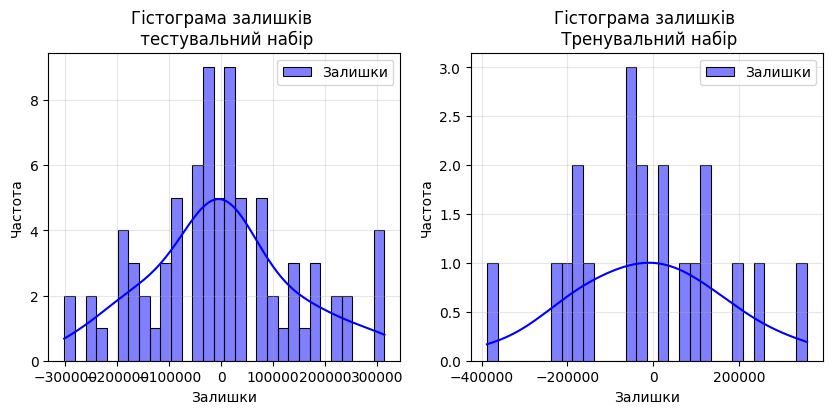

OLS із коефіцієнтами, де p-value < 0.05


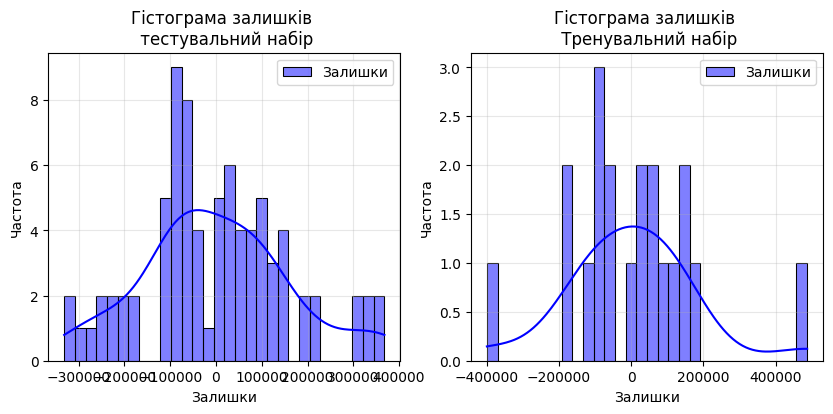

OLS із коефіцієнтами, де p-value < 0.25


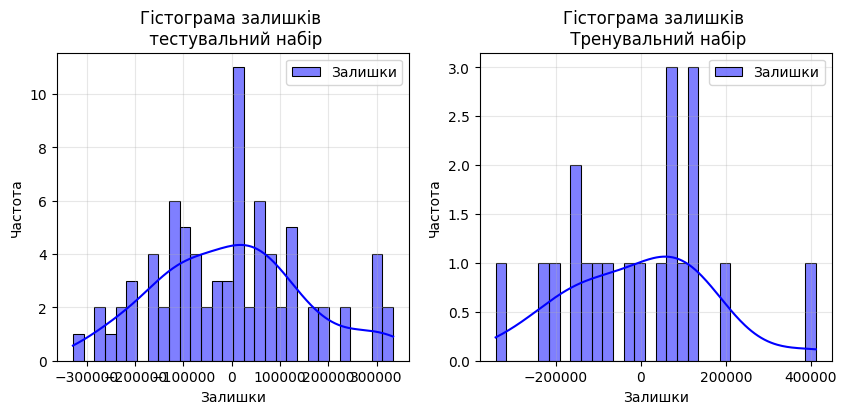

In [75]:
print("OLS на всіх коефіцієнтах")
ols_result.visualize_residuals()
print("OLS із коефіцієнтами, де p-value < 0.05")
ols_model_ss.visualize_residuals()
print("OLS із коефіцієнтами, де p-value < 0.25")
ols_model_ss_25.visualize_residuals()

Для моделі **"OLS на всіх коефіцієнтах"** залищки виглядають симетрично, з невилкою асиметрією до негатиних значень, що більш видно для гістограмизалишків для тренувального набору. Розподіл схожий на нормальни, але наявні хвости.

Для моделі **"OLS із коефіцієнтами, де p-value < 0.05"** розподіл залишків також схожий на нормальний, є невелика асиметрія у напрямку до негативних значень.

Для моделі **"OLS із коефіцієнтами, де p-value < 0.25"** розподіл залишків також схожий на нормальний, але з більшими хвостами.

**Висновок**:

Отже маємо наступні результати

| Модель                                  | $R_{adj}^2$ | $R_{adj}^2$  |
|-----------------------------------------|-------------|--------------|
| OLS на всіх коефіцієнтах                | 0.9812      | 0.9735       |
| OLS із коефіцієнтами, де p-value < 0.05 | 0.9762      | 0.9727       |
| OLS із коефіцієнтами, де p-value < 0.25 | 0.9783      | 0.9737       |



З використанням **"OLS на всіх коефіцієнтах"** маемо значення $R^2 = 0.9812 $ та  $R_{adj}^2 = 0.9735$.
Після строби зменшити мультиколінеарність не відбулось поеращення.

При рівні статистичної значущості $p-value < 0.05:$  $R^2 = 0.9762 $ та $ = 0.9727$ (**"OLS із коефіцієнтами, де p-value < 0.05"**).
При тернуванні після видалення мультиколінеарності $R^2 = 0.9730 $ та  $R_{adj}^2 = 0.9699$. Отже хоч модель і спрощується, але знижується точність.

При рівні статистичної значущості $p-value < 0.25:$  $R^2 = 0.9783 $ та  $R_{adj}^2 = 0.9737$  (**"OLS із коефіцієнтами, де p-value < 0.25"**).

В цілому можемо сказати про покращення точності, при виборі менш суворого порогу.

При виборі яку б модель залишити, то можна залишити другу - **OLS із коефіцієнтами, де p-value < 0.05**.
Для другої моделі з коефіціентами рівні статистичної значущості $p-value < 0.05$ маємо візуально найкраще розподілені залишки і при цьому достатньо високу якість.
Також можна подумати і на рахунок третої моделі з $p-value < 0.25$.  Адже зменшуючи кількість коефіцієнтів спрощуємо модель, при цьому в точності не дуже сильно втрачаємо, виглядає як компроміс.